In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import sketch 
import warnings
warnings.filterwarnings("ignore")

In [27]:
data=pd.read_csv("clean_data.csv")

In [28]:
data=data.drop(columns=['Unnamed: 0'])

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
data.sketch.ask("how to group outcome with mean of each columns")

### Using RFE for Feature Selection

In [31]:
from sklearn.feature_selection import RFE

In [32]:
X=data.drop('Outcome',axis=1)

In [33]:
Y=data['Outcome']

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a Linear Regression model
model = LogisticRegression()

# Create the RFE object with the Linear Regression model and specify the desired number of features
rfe = RFE(estimator=model, n_features_to_select=2)

# Fit the RFE object to the scaled data
rfe.fit(X, Y)

# Print the rankings of the selected features
feature_rankings = rfe.ranking_
for feature, rank in zip(X.columns, feature_rankings):
    print(f"{feature}: {rank}")

Pregnancies: 1
Glucose: 3
BloodPressure: 5
SkinThickness: 6
Insulin: 7
BMI: 2
DiabetesPedigreeFunction: 1
Age: 4


## Using ch-square test for feature selection

In [35]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [36]:
# Perform Chi-square test for feature selection
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, Y)

# Get the p-values and feature scores from the Chi-square test
p_values = chi2_selector.pvalues_
feature_scores = -np.log10(p_values)

# Rank the features based on their scores
feature_ranking_chi2 = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores}).sort_values('Score', ascending=False)

In [37]:
feature_ranking_chi2

,Feature,Score
4,Insulin,inf
1,Glucose,307.366373
7,Age,38.049379
5,BMI,28.075639
0,Pregnancies,24.813081
3,SkinThickness,9.293192
2,BloodPressure,4.377498
6,DiabetesPedigreeFunction,1.660187


## Model Scaling

In [38]:
selected_columns = ['Insulin','Glucose','Age']
selected_data = data[selected_columns]

from sklearn.preprocessing import StandardScaler
# Scale the selected columns using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)


In [39]:
#X=data[['Insulin','Glucose','Age']]
X=scaled_data
Y=data['Outcome']

### Model

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Applying different algorithms

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

print("Random Forest Accuracy:", random_forest_accuracy)


# k-Nearest Neighbors -- 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)

# Support Vector Machines -- 699


# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
naive_bayes_predictions = model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)


Random Forest Accuracy: 0.7712418300653595
k-Nearest Neighbors Accuracy: 0.7058823529411765
Naive Bayes Accuracy: 0.7777777777777778


In [43]:



# Create a Linear Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.7712418300653595


### Checking if predcition are correct or not

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate and print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc_score)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.70      0.58      0.64        53

    accuracy                           0.77       153
   macro avg       0.75      0.73      0.74       153
weighted avg       0.77      0.77      0.77       153

[[87 13]
 [22 31]]
ROC AUC Score: 0.7274528301886793


### Using Roc Curve

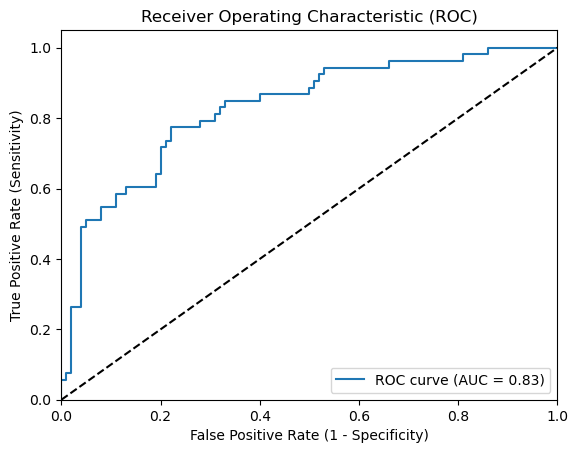

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have the true labels y_test and the predicted class labels y_test_pred

# Calculate the predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]  ### X_test as all features

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [51]:
# pickle to import pickle file for deploy of ml model on stramlit or pn flask
import pickle
file=open('Naive_bayes_model.pkl','wb')
pickle.dump(model, file)